In [ ]:
# Display Lunar Lander GIF
from IPython.display import Image
Image(url= "https://gymnasium.farama.org/_images/lunar_lander.gif")

In [ ]:
# Install dependencies
# Packages preinstalled on Google Colab:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install torch

# Packages not pre-installed on Google Colab:
!pip install moviepy
!pip install torchinfo
!pip install ufal.pybox2d
!pip install gymnasium
!pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import gymnasium as gym

# Initialize environment
env = gym.make("LunarLander-v2",
               continuous = False,      # Discrete version
               gravity = -10.0,
               enable_wind = False,
               wind_power = 0.0,
               turbulence_power = 0.0,
               render_mode="rgb_array") # Render for machine

# Reset environment with random number generator seed for reproducibility
state, info = env.reset(seed = 21)

print("Environment metadata:\n", env.metadata)
print("\nState space:\n", env.observation_space)
print("\nAction space:\n", env.action_space)
print("\nStarting state:\n", state)

Environment metadata:
 {'render_modes': ['human', 'rgb_array'], 'render_fps': 50}

State space:
 Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)

Action space:
 Discrete(4)

Starting state:
 [ 0.00786695  1.4032904   0.796822   -0.33911794 -0.00910905 -0.18049194
  0.          0.        ]


In [ ]:
import pandas as pd

# Determine average starting state from 100 random samples
starting_states = []
for _ in range(100):
    starting_state, info = env.reset()
    starting_states.append(starting_state)

features = ['x','y','vx','vy','angle','ang_vel','left_leg','right_leg']
starting_states_df = pd.DataFrame(starting_states, columns = features)
starting_states_df.describe()

,x,y,vx,vy,angle,ang_vel,left_leg,right_leg
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
mean,-0.000202,1.410030,-0.020460,-0.039560,0.000241,0.004635,0.0,0.0
std,0.004445,0.007046,0.450270,0.313165,0.005151,0.101993,0.0,0.0
min,-0.007806,1.398572,-0.790636,-0.548822,-0.009096,-0.180236,0.0,0.0
25%,-0.003390,1.404051,-0.343335,-0.305285,-0.003875,-0.076865,0.0,0.0
50%,-0.000128,1.409595,-0.012973,-0.058933,0.000155,0.002939,0.0,0.0
75%,0.003350,1.416666,0.339339,0.255355,0.003934,0.077771,0.0,0.0
max,0.007856,1.421770,0.795693,0.482209,0.009052,0.179091,0.0,0.0


In [ ]:
from gymnasium.utils.save_video import save_video
import numpy as np
from IPython.utils.capture import capture_output
import matplotlib
import matplotlib.pyplot as plt

# Display graphs inline
%matplotlib inline

# Check if inline display is possible
is_ipython = 'inline' in matplotlib.get_backend()

# If Jupyter notebook
if is_ipython:
    from IPython import display

class LunarLander:
    '''
    General lunar lander class
    subject entirely to its environment
    '''
    def __init__(self, name = "Agentless Lander", step_limit = 600):
        '''
        Initialize agent
        '''
        self.name = name
        self.prefix = "-".join(name.split()).lower() # filename prefix
        self.step_limit = step_limit  # max. allowed steps/episode

        # Initialize environment
        self.env = gym.make("LunarLander-v2",
               continuous = False,           # Discrete version
               gravity = -10.0,
               enable_wind = False,
               wind_power = 0.0,
               turbulence_power = 0.0,
               render_mode="rgb_array_list") # Render for machine

        # Define actions
        self.NOOP = 0   # No operation (i.e., do nothing)
        self.LEFT = 1   # Fire left orientation engine
        self.MAIN = 2   # Fire main downward engine
        self.RIGHT = 3  # Fire right orientation engine

        # Reset environment with random number generator seed for reproducibility
        self.state, self.info = self.env.reset(seed = 21)

        # Set environment dimensions
        self.features_size = len(self.state)
        self.actions_size = env.action_space.n

        # Initialize data logs
        self.scores = []
        self.steps = []
        self.policy = []

        # Initialize total iteration step count
        self.total_steps = 0

        # Initialize parameters needed for reinforcement learning agents
        # to prevent errors. These will not be used for non-RL agents
        self.memory = []
        self.batch_size = 1
        self.scheduler = None

    def select_action(self, state):
        '''
        Select action given state
        '''
        # Do nothing
        return self.NOOP

    def episode(self):
        '''
        Complete episode in given environment
        Return score, steps count, and actions log
        '''
        # Initialize rewards total
        score = 0.0

        # Initialize steps count
        episode_steps = 0

        # Initialize actions list
        actions = []

        # Start new episode
        state, info = self.env.reset()

        # Until end of episode
        while True:
            # Get action based on current state
            action = self.select_action(state)

            # Obtain next state, reward, terminated status, truncated status,
            # and environment info for given action
            next_state, reward, terminated, truncated, info = self.env.step(action)

            # Accumulate reward total
            score += reward

            # Increment episode steps
            episode_steps += 1

            # Increment overall step count
            self.total_steps += 1

            # Record action
            actions.append(action)

            # If number of steps has been surpassed or end of episode
            if (episode_steps > self.step_limit) or terminated or truncated:
                break  # out of loop

            # Advance to next state
            state = next_state

        return score, episode_steps, actions

    def iterate(self, n = 100,      # Number of iterations
                verbose = False,    # Print results for each episode
                video = False,      # Output videos of (k^3)th episodes
                plot = True):       # Display plot updated every episode
        '''
        Attempt task for n episodes
        '''
        # Enable interactive plotting
        plt.ion()

        # Counter for indexing start of videos
        video_step_start = 0

        # Repeat n times
        for episode in range(n):
            # Complete one episode
            score, episode_steps, actions = self.episode()

            # Log scores, steps, policy
            self.scores.append(score)
            self.steps.append(episode_steps)
            self.policy.append(actions)

            # If there are at least buffer_size transitions
            # in the buffer memory
            if (len(self.memory) >= self.batch_size):
                # Increment learning rate scheduler count
                # Scheduler will perform learning rate decrement
                # after kth episode specified in lr_period parameter
                self.scheduler.step()

            if plot:
                # Update training plot
                self.plot_scores()

            if verbose:
                # Report result
                print(f"Episode {episode} score: {score}")

            if video:
                # Suppress MoviePy stdout
                # https://stackoverflow.com/a/35624406/14371011
                with capture_output() as captured:
                    # Save mp4 of every (k^3)th episode (0, 1, 8, 27, ...)
                    save_video(self.env.render(),
                               video_folder = "videos",
                               name_prefix = self.prefix,
                               fps = env.metadata["render_fps"],
                               step_starting_index = video_step_start,
                               episode_index = episode)

            # Advance starting step index for videos
            video_step_start = episode_steps + 1

        if plot:
            # Plot final result
            self.plot_scores(show_result = True)
            plt.show() # Display plot

        # Disable interactive plotting
        plt.ioff()

    def score_stats(self, verbose = False):
        '''
        Return mean, max, and min of scores if they exist
        '''
        # If scores exist
        if (len(self.scores) > 0):
            # Calculate average, max, and min score
            average = np.average(self.scores)
            max = np.max(self.scores)
            min = np.min(self.scores)

            # Calculate average episode length
            avg_length = np.average(self.steps)

            if verbose:
                # Report average, max, and min
                print(f"\nAverage score: {average:.1f}")
                print(f"Maximum score: {max:.1f}")
                print(f"Minimum score: {min:.1f}")
                print(f"Average episode length: {avg_length:.1f}")

            return average, max, min, avg_length
        else:
            print("No scores have been calculated")
            return None, None, None

    def plot_scores(self, show_result = False):
        '''
        Dynamically plot episode scores
        Plot running average at conclusion
        '''
        # Initialize plot
        plt.figure(1)
 # If not final plot
        if not show_result:
            # Clear current figure
            plt.clf()

        # Plot solution threshold
        plt.axhline(y = 200, color = "r", linestyle = "dashed", label = "Solution Threshold")

        # Plot episode-by-episode scores
        plt.plot(self.scores, label = self.name)
        plt.title(self.name)
        plt.xlabel("Episode")
        plt.ylabel("Score")

        # If final plot
        if show_result:
            # Plot running average

            # Span for running average
            window = 25

            # Initialize list with one fewer NaNs than window
            averages = [np.nan] * (window - 1)

            # Calculate running average
            for idx in range(len(self.scores) - window + 1):
                averages.append(np.mean(self.scores[idx : idx + window]))

            # Plot running average
            plt.plot(averages, color = "k", label = "Running Average")

        plt.legend()

        # Pause to allow plot to update
        plt.pause(0.001)

        # If Jupyter notebook
        if is_ipython:
            if not show_result:
                # Display plot
                display.display(plt.gcf())
                # Clear plot when done
                display.clear_output(wait = True)
            else:
                # Display plot
                display.display(plt.gcf())

In [ ]:
cubes = [0, 1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000, 9261, 10648, 12167, 13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791, 32768, 35937, 39304, 42875, 46656, 50653, 54872, 59319, 64000]
len(cubes)

41

In [ ]:
# Define random agent class

class RandomAgent(LunarLander):
    '''
    Inherits from lunar lander class
    and acts randomly
    '''
    def __init__(self, name = "Random Agent"):
        LunarLander.__init__(self, name)

    def select_action(self, state):
        '''
        Randomly select action
        '''
        # Randomly select action from action space
        action = self.env.action_space.sample()

        return action

In [ ]:
class ReflexAgent(LunarLander):
    '''
    Inherits from lunar lander class, but
    selects actions according to horizontal
    and angular position and angular velocity
    '''
    def __init__(self, name = "Reflex Agent"):
        LunarLander.__init__(self, name)

    def select_action(self, state):
        '''
        Select action according to horizontal and
        angular position and angular velocity
        '''
        # Set tolerances
        horiz_vel_tolerance = 0.4
        ang_vel_tolerance = 0.001

        # Horizontal velocity
        vx = state[3]

        # Angular velocity
        ang_vel = state[5]

        # If leftward horizontal velocity
        if ((vx < -horiz_vel_tolerance) and
            # and clockwise velocity
            (ang_vel > ang_vel_tolerance)):

            # Then, fire thruster to move right
            action = self.RIGHT

        # If rightward horizontal velocity
        elif ((vx > horiz_vel_tolerance) and
              # If counter-clockwise velocity
              (ang_vel < -ang_vel_tolerance)):

            # Then, fire thruster to move left
            action = self.LEFT

        else:
            # Do nothing
            action = self.NOOP

        return action

In [ ]:
# Define Replay Memory Buffer and Deep Q-Network
# Adapted from: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
# Additional references:
# https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html#building-models-with-pytorch
# https://pytorch.org/docs/stable/notes/randomness.html

import random
from collections import namedtuple, deque

# Named tuple data structure to encode a single state transition
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

# Buffer class to hold and randomly sample recent transitions
class ReplayMemory(object):

    def __init__(self, capacity):
        '''
        Initialize buffer with empty double-ended queue
        of size "capacity"
        '''
        self.memory = deque([], maxlen = capacity)

        # Set random seed for reproducibility
        random.seed(21)

    def push(self, *args):
        '''
        Add a transition to buffer
        '''
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        '''
        Randomly sample batch of transitions from buffer
        '''
        return random.sample(self.memory, batch_size)

    def __len__(self):
        '''
        Returns number of transitions in buffer
        '''
        return len(self.memory)

import torch
import torch.nn as nn
import torch.nn.functional as F

# Deep Q-Network
class DQN(nn.Module):

    def __init__(self, features_size, actions_size):
        '''
        Initialize neural network
        '''
        super(DQN, self).__init__()

        # First fully-connected layer:
        # Input dimensions: 1 x no. of state feature
        # Output dimensions: 1 x 128
        self.fc1 = nn.Linear(features_size, 128)

        # Second fully-connected layer:
        # Input: 1 x 128; Output: 1 x 128
        self.fc2 = nn.Linear(128, 128)

        # Final fully-connected layer:
        # Input: 1 x 128;
        # Output: 1 x no. of possible actions
        self.fc3 = nn.Linear(128, actions_size)

    def forward(self, state):
        '''
        Forward propagation function
        Input: State features (e.g., position, velocity, ...)
        Output: tensor of action values
        '''
        # First layer followed by ReLU activation function
        z = F.relu(self.fc1(state))

        # Second layer followed by ReLU activation function
        z = F.relu(self.fc2(z))

        # Final output layer
        return self.fc3(z)

In [ ]:
# Define DQN agent
# References:
# Adapted from: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
# Additional references:
# https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html#building-models-with-pytorch
# https://pytorch.org/docs/stable/notes/randomness.html
# https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html
# https://pytorch.org/docs/stable/generated/torch.max.html
# https://stackoverflow.com/questions/19339/transpose-unzip-function-inverse-of-zip/19343
# https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
# https://pytorch.org/docs/stable/optim.html
# https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.StepLR.html
# https://machinelearningmastery.com/using-learning-rate-schedule-in-pytorch-training/


import torch.optim as optim
import math

class DQNAgent(LunarLander):
    '''
    Inherits from lunar lander class, but
    iteratively learns from experience to approximate
    Q-values from state features with a neural network
    '''
    def __init__(self,
                 name = "DQN Agent",
                 alpha = 0.1,          # initial optimizer learning rate
                 epsilon = (1.0,       # epsilon-greedy max
                            0.01,      # epsilon-greedy min
                            0.001),    # exponential decay rate (smaller = slower)
                 gamma = 0.99,         # discount rate
                 tau = 0.005,          # target network update rate
                 lr_period = 100,      # episodes between learning rate decreases
                 lr_decay = 0.1,       # learning rate decay
                 batch_size = 128,     # replay buffer batch size
                 buffer_size = 1000000 # replay buffer size (no. of transitions)
                 ):
        '''
        Initialize agent hyperparameters and data structures
        '''
        LunarLander.__init__(self, name)
        self.alpha = alpha
        self.eps_max, self.eps_min, self.eps_decay = epsilon
        self.gamma = gamma
        self.tau = tau
        self.batch_size = batch_size
        self.total_steps = 0

        # Set random seeds for reproducibility
        torch.manual_seed(21)
        random.seed(21)

        # Set device to GPU if available
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print("Device:",self.device)

        # Initialize online and target deep Q-networks
        # and move to selected device
        self.online_net = DQN(self.features_size, self.actions_size).to(self.device)
        self.target_net = DQN(self.features_size, self.actions_size).to(self.device)
        self.target_net.load_state_dict(self.online_net.state_dict())

        # Initialize optimizer
        self.optimizer = optim.AdamW(self.online_net.parameters(),
                                lr = self.alpha, # learning rate
                                amsgrad = True)  # Reddi et al., 2019 variant

        # Initialize learning rate scheduler
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer,
                                                   step_size = lr_period,
                                                   gamma = lr_decay,
                                                   verbose = False)

        # Initialize Huber loss function
        self.criterion = nn.SmoothL1Loss()

        # Initialize replay memory buffer
        # with maximum capacity of buffer_size transitions
        self.memory = ReplayMemory(buffer_size)

    def select_action(self, state):
        '''
        Epsilon-greedy action selection with online DQN
        '''
        # Calculate exponentially decaying epsilon-greedy threshold
        # (as number of steps becomes large, threshold becomes minimum)
        eps_threshold = (self.eps_min + (self.eps_max - self.eps_min)
                        * math.exp(-self.total_steps * self.eps_decay))

        # Increment total steps
        self.total_steps += 1

        # Epsilon-greedy algorithm
        # If random number [0,1) is greater than epsilon threshold
        if (random.random() > eps_threshold):
            # Without backward propagation
            with torch.no_grad():
                # Select action with maximum expected reward
                # from online network

                # Get index of maximum expected reward
                max_value_index = self.online_net(state).max(1)[1]

                # Get corresponding action
                best_action = max_value_index.view(1,1)

                return best_action

        else:
            # Randomly select action from action space
            # and return as tensor
            return torch.tensor([[env.action_space.sample()]],
                                device = self.device, dtype = torch.long)

    def optimize_model(self):
        '''
        Perform single step of optimization on batch of transitions
        '''
        # If fewer transitions in replay buffer than batch size
        if len(self.memory) < self.batch_size:
            # Can't run batch yet
            # so, just keep collecting transitions
            return

        else:
            # Randomly select batch of transitions from
            # replay buffer
            transitions = self.memory.sample(self.batch_size)

            # Transpose from batch array of transitions
            # to transition of batch-arrays
            batch = Transition(*zip(*transitions))

            # Mask to select only non-final states
            # (i.e., states whose next state is not null)
            non_final_mask = torch.tensor(tuple(map(lambda s:
                                                    s is not None,
                                                    batch.next_state)),
                                                    device = self.device,
                                                    dtype = torch.bool)

            # Concatenate the non-null next states
            non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])

            # Concatenate states, actions, and rewards
            state_batch = torch.cat(batch.state)
            action_batch = torch.cat(batch.action)
            reward_batch = torch.cat(batch.reward)

            # Calculate online network Q-values for each state and action, Q(s,a)
            online_Q_values = self.online_net(state_batch).gather(1, action_batch)

            # Initialize tensor of next state expected rewards, V(s') = 0
            target_next_state_values = torch.zeros(self.batch_size, device = self.device)

            # Without back propagation
            with torch.no_grad():
                # Calculate target network expected reward (i.e., value)
                # for each next state, V(s') (post-terminal states will have have value 0)
                target_next_state_values[non_final_mask] = self.target_net(non_final_next_states).max(1)[0]

            # Calculate target network expected Q values
            target_expected_Q_values = ((target_next_state_values * self.gamma)
                                            + reward_batch)

            # Calculate loss by comparing online and target network Q values
            loss = self.criterion(online_Q_values,
                            target_expected_Q_values.unsqueeze(1))

            # Reset optimizer gradients
            self.optimizer.zero_grad()

            # Back propagation
            loss.backward()

            # Perform gradient clipping by value to prevent exploding gradients
            torch.nn.utils.clip_grad_value_(self.online_net.parameters(), 100)

            # Adjust learning weights
            self.optimizer.step()

    def episode(self):
        '''
        Complete episode in given environment
        Call DQN optimizer
        Update online and target networks
        Return score, steps count, and actions log
        '''
        # Initialize rewards total
        score = 0.0

        # Initialize steps count
        episode_steps = 0

        # Initialize actions list
        actions = []

        # Start new episode
        state, info = self.env.reset()

        #Convert to tensor
        state = torch.tensor(state,
                            dtype = torch.float32,
                            device = self.device).unsqueeze(0)

        # Until end of episode
        while True:
            # Get action based on current state
            action = self.select_action(state)

            # Obtain next state, reward, terminated status, truncated status,
            # and environment info for given action
            next_state, reward, terminated, truncated, info = self.env.step(action.item())

            # Accumulate reward total
            score += reward

            # Convert reward to tensor
            reward = torch.tensor([reward], device = self.device)

            # Increment episode steps
            episode_steps += 1

            # Increment overall step count
            self.total_steps += 1

            # Record action
            actions.append(action)

            # If action taken leads to terminated state
            if terminated or truncated:
                # Next state is null
                next_state = None
            else:
                # Convert next state to tensor
                next_state = torch.tensor(next_state,
                                        dtype = torch.float32,
                                        device = self.device).unsqueeze(0)

            # Store transition in replay buffer
            self.memory.push(state, action, next_state, reward)

            # Advance to next state
            state = next_state

            # Perform one step of optimization on online network
            self.optimize_model()

            # Get target and online network state dicts
            target_net_state_dict = self.target_net.state_dict()
            online_net_state_dict = self.online_net.state_dict()

            # For each parameter in the online network state dict
            for param in online_net_state_dict:
                # Update target network weights at rate tau
                # target parameter <-- tau(online parameter) + (1-tau)(target parameter)
                target_net_state_dict[param] = (online_net_state_dict[param]*self.tau
                                                + target_net_state_dict[param]*(1-self.tau))

            # Load updated target network state dict
            self.target_net.load_state_dict(target_net_state_dict)

            # If max. number of steps has been surpassed or end of episode
            if (episode_steps > self.step_limit) or terminated or truncated:
                break

        return score, episode_steps, actions

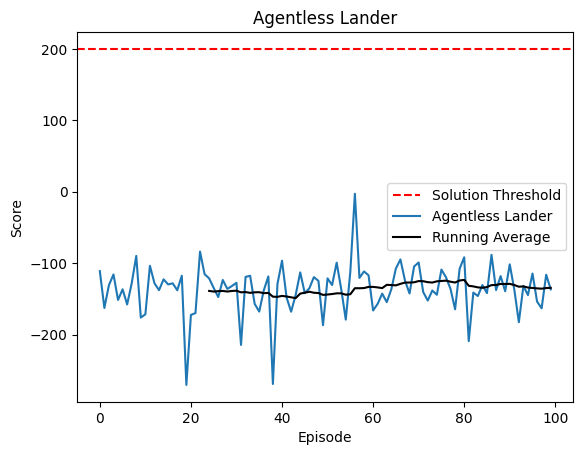

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Average score: -135.8
Maximum score: -2.8
Minimum score: -270.4
Average episode length: 71.0


In [ ]:
# Instantiate agentless lunar lander
agentless_lander = LunarLander()

# Maintain list of agent objects
agents = [agentless_lander]

episodes = 100

# Iterate over selected number of episodes
agentless_lander.iterate(episodes, verbose = False, video = True, plot = True)

# Print average, max, min
average, max, min, avg_length = agentless_lander.score_stats(verbose = True)

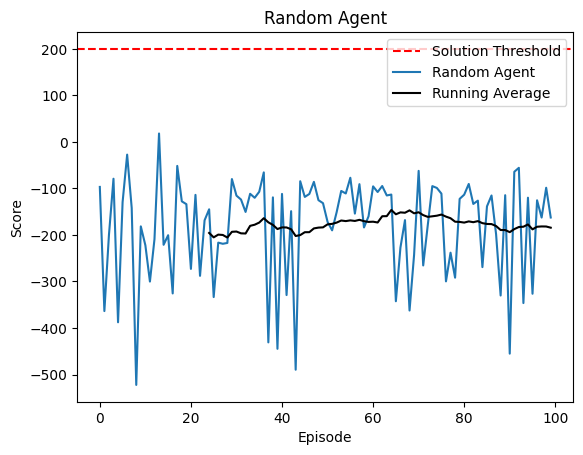

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Average score: -180.5
Maximum score: 18.2
Minimum score: -522.4
Average episode length: 94.7


In [ ]:
# Instantiate lunar lander random agent
rand_agent = RandomAgent()

# Add to list of agents
agents.append(rand_agent)

# Iterate over episodes
rand_agent.iterate(episodes, verbose = False, video = True)

# Print average, max, min
average, max, min, avg_length = rand_agent.score_stats(verbose = True)

In [ ]:
def plot_comparison(agents):
    '''
    Plot scores of multiple agent objects
    '''
    # Initialize plot
    plt.figure(1)
    plt.ylim([-600,300])

    # Plot solution threshold
    plt.axhline(y = 200, color = "r", linestyle = "dashed", label = "Solution Threshold")

    # Initialize list of agent names
    names = []

    # Iterate over agents list
    for agent in agents:
        # Plot agent's scores
        plt.plot(agent.scores, label = agent.name)
        names.append(agent.name)

    plt.title(", ".join(names))
    plt.xlabel("Episode")
    plt.ylabel("Score")
    plt.legend()
    plt.show();

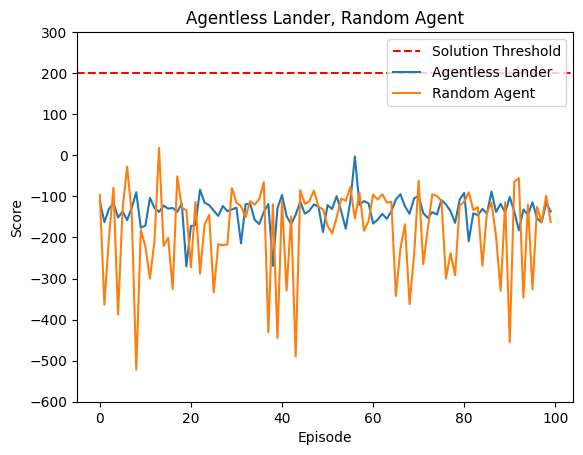

In [ ]:
# Plot agentless lander and random agent scores over all episodes
plot_comparison(agents)

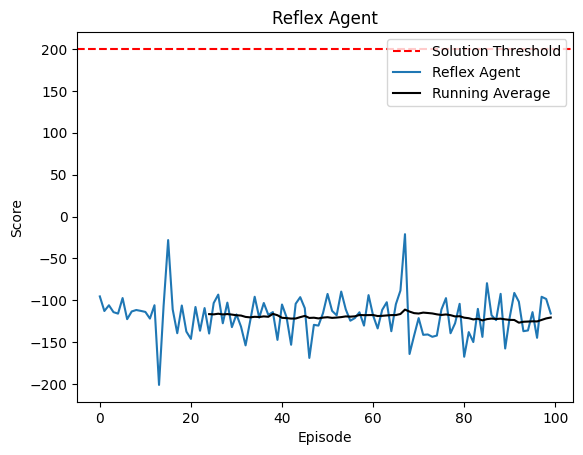

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Average score: -118.5
Maximum score: -21.0
Minimum score: -200.9
Average episode length: 69.1


In [ ]:
# Instantiate lunar lander reflex agent
rflx_agent = ReflexAgent()

# Add to list of agents
agents.append(rflx_agent)

# Iterate over episodes
rflx_agent.iterate(episodes, verbose = False, video = True)

# Print average max, min
average, max, min, avg_length = rflx_agent.score_stats(verbose = True)

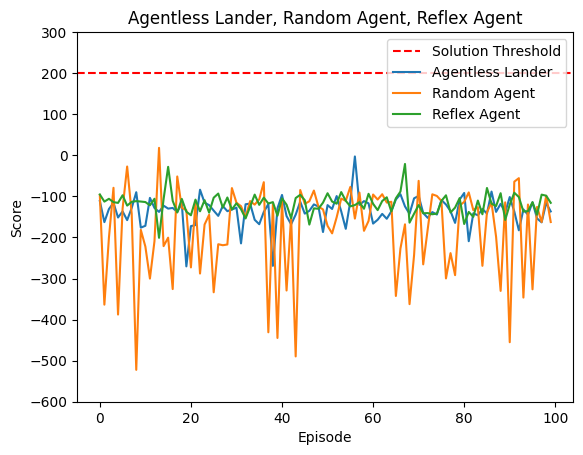

In [ ]:
# Plot comparison of agents
plot_comparison(agents)

In [ ]:
# Hyperparameters
name = "DQN Agent 1"
alpha = 0.1             # initial optimizer learning rate
epsilon = (0.99,        # epsilon-greedy max (starting value)
        0.01,           # epsilon-greedy min (ending value)
        0.001)          # exponential decay rate (smaller = slower)
gamma = 0.99            # discount rate
tau = 0.005             # target network update rate
lr_period = 100         # episodes between learning rate decreases
lr_decay = 0.1          # learning rate decay
batch_size = 128        # replay buffer batch size
buffer_size = 1000000   # replay buffer size (no. of transitions)

In [ ]:
# Instantiate lunar lander DQN agent
dqn_agent1 = DQNAgent(name, alpha, epsilon, gamma, tau, lr_period, lr_decay, batch_size, buffer_size)

# View model summary
# https://github.com/TylerYep/torchinfo
# https://discuss.pytorch.org/t/how-to-check-if-model-is-on-cuda/180/7

print("Model parameters on CUDA?",next(dqn_agent1.online_net.parameters()).is_cuda)
print(dqn_agent1.online_net)

from torchinfo import summary
import warnings

# Temporarily disable warnings to suppress this
# PyTorch warning: UserWarning: TypedStorage is deprecated.
# It will be removed in the future and UntypedStorage will
# be the only storage class. This should only matter to you
# if you are using storages directly.  To access UntypedStorage
# directly, use tensor.untyped_storage() instead of tensor.storage()
warnings.filterwarnings("ignore")

# Print TensorFlow-like model summary
summary(dqn_agent1.online_net,
        input_size = (dqn_agent1.batch_size, dqn_agent1.features_size))

Device: cpu
Model parameters on CUDA? False
DQN(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Layer (type:depth-idx)                   Output Shape              Param #
DQN                                      [128, 4]                  --
├─Linear: 1-1                            [128, 128]                1,152
├─Linear: 1-2                            [128, 128]                16,512
├─Linear: 1-3                            [128, 4]                  516
Total params: 18,180
Trainable params: 18,180
Non-trainable params: 0
Total mult-adds (M): 2.33
Input size (MB): 0.00
Forward/backward pass size (MB): 0.27
Params size (MB): 0.07
Estimated Total Size (MB): 0.34

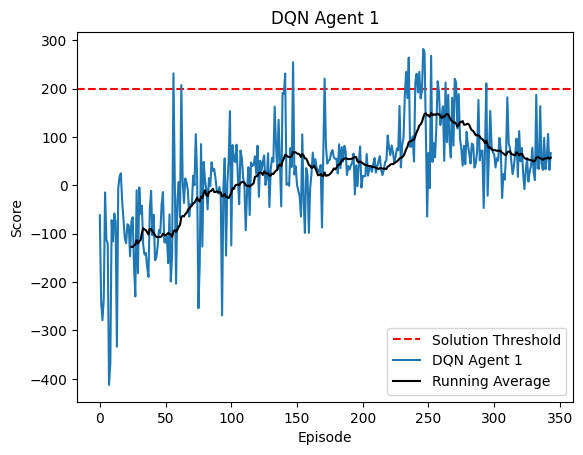

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Average score: 27.3
Maximum score: 281.8
Minimum score: -412.6
Average episode length: 485.5


In [ ]:
# Train DQN agent

# If GPU device is available
if torch.cuda.is_available():
    episodes = 513
    print("Device: cuda")
else:
    episodes = 344
    print("Device: cpu")

# Train for specified number of episodes
dqn_agent1.iterate(episodes, verbose = False, video = True)

# Print average, max, min
average, max, min, avg_length = dqn_agent1.score_stats(verbose = True)

In [ ]:
# Hyperparameters
name = "DQN Agent 2"
alpha = 0.1             # initial optimizer learning rate
epsilon = (0.99,        # epsilon-greedy max (starting value)
        0.01,           # epsilon-greedy min (ending value)
        0.001)          # exponential decay rate (smaller = slower)
gamma = 0.8             # discount rate
tau = 0.005             # target network update rate
lr_period = 100         # episodes between learning rate decreases
lr_decay = 0.1          # learning rate decay
batch_size = 128        # replay buffer batch size
buffer_size = 1000000   # replay buffer size (no. of transitions)

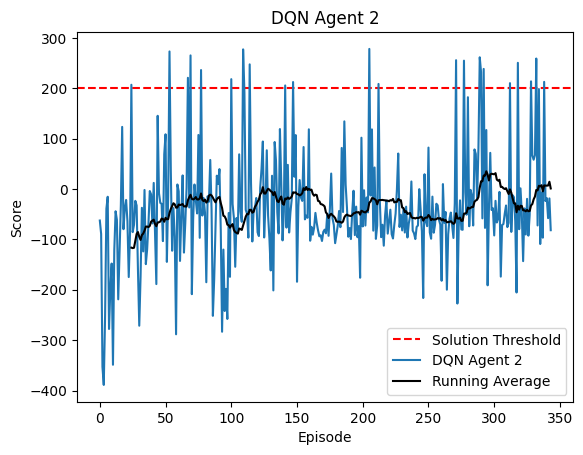

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Average score: -37.9
Maximum score: 277.9
Minimum score: -388.9
Average episode length: 475.5


In [ ]:
# Instantiate second lunar lander DQN agent
dqn_agent2 = DQNAgent(name, alpha, epsilon, gamma, tau, lr_period, lr_decay, batch_size, buffer_size)

# Train for specified number of episodes
dqn_agent2.iterate(episodes, verbose = False, video = True)

# Print average, max, min
average, max, min, avg_length = dqn_agent2.score_stats(verbose = True)

In [ ]:
# Hyperparameters
name = "DQN Agent 3"
alpha = 0.1             # initial optimizer learning rate
epsilon = (0.99,        # epsilon-greedy max (starting value)
        0.01,           # epsilon-greedy min (ending value)
        0.001)          # exponential decay rate (smaller = slower)
gamma = 0.75            # discount rate
tau = 0.005             # target network update rate
lr_period = 200         # episodes between learning rate decreases
lr_decay = 0.1          # learning rate decay
batch_size = 128        # replay buffer batch size
buffer_size = 1000000   # replay buffer size (no. of transitions)

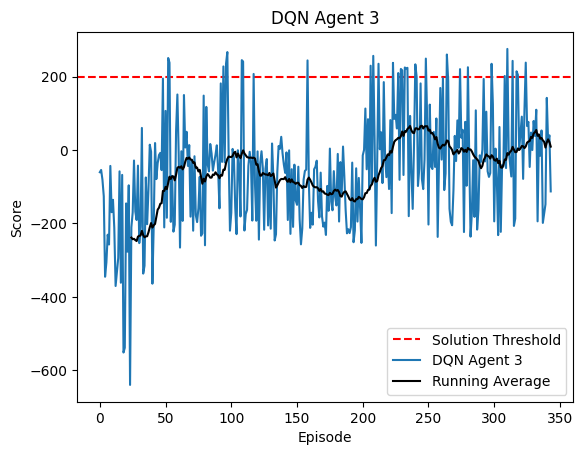

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Average score: -55.1
Maximum score: 275.7
Minimum score: -640.2
Average episode length: 355.9


In [ ]:
# Instantiate lunar lander DQN agent
dqn_agent3 = DQNAgent(name, alpha, epsilon, gamma, tau, lr_period, lr_decay, batch_size, buffer_size)

# Train for specified number of episodes
dqn_agent3.iterate(episodes, verbose = False, video = True)

# Print average, max, min
average, max, min, avg_length = dqn_agent3.score_stats(verbose = True)

In [ ]:
# Hyperparameters
name = "DQN Agent 4"
alpha = 0.1             # initial optimizer learning rate
epsilon = (0.99,        # epsilon-greedy max (starting value)
        0.01,           # epsilon-greedy min (ending value)
        0.0001)         # exponential decay rate (smaller = slower)
gamma = 0.7             # discount rate
tau = 0.01              # target network update rate
lr_period = 200         # episodes between learning rate decreases
lr_decay = 0.1          # learning rate decay
batch_size = 256        # replay buffer batch size
buffer_size = 10000000  # replay buffer size (no. of transitions)

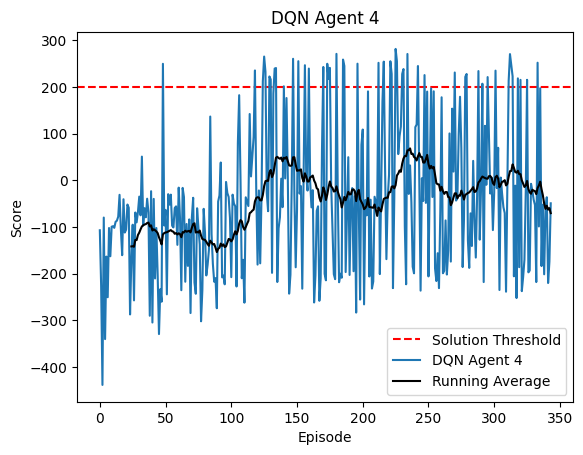

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Average score: -44.0
Maximum score: 281.7
Minimum score: -438.2
Average episode length: 360.0


In [ ]:
# Instantiate lunar lander DQN agent
dqn_agent4 = DQNAgent(name, alpha, epsilon, gamma, tau, lr_period, lr_decay, batch_size, buffer_size)

# Train for specified number of episodes
dqn_agent4.iterate(episodes, verbose = False, video = True)

# Print average, max, min
average, max, min, avg_length = dqn_agent4.score_stats(verbose = True)

In [ ]:
# Hyperparameters
name = "DQN Agent 5"
alpha = 0.1             # initial optimizer learning rate
epsilon = (0.99,        # epsilon-greedy max (starting value)
        0.01,           # epsilon-greedy min (ending value)
        0.0001)         # exponential decay rate (smaller = slower)
gamma = 0.7             # discount rate
tau = 0.01              # target network update rate
lr_period = 200         # episodes between learning rate decreases
lr_decay = 0.1          # learning rate decay
batch_size = 512        # replay buffer batch size
buffer_size = 100000000 # replay buffer size (no. of transitions)

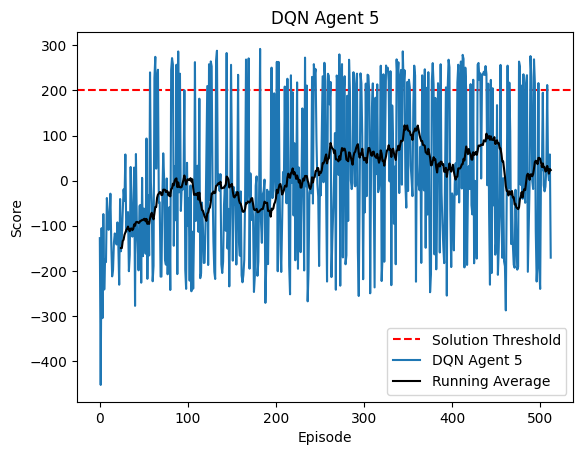

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Average score: 4.7
Maximum score: 292.2
Minimum score: -453.1
Average episode length: 350.3


In [ ]:
# Reset the second lunar lander DQN agent
dqn_agent5 = DQNAgent(name, alpha, epsilon, gamma, tau, lr_period, lr_decay, batch_size, buffer_size)

# If GPU device is available
if torch.cuda.is_available():
    episodes = 730
    print("Device: cuda")
else:
    episodes = 513
    print("Device: cpu")

# Train for specified number of episodes
dqn_agent5.iterate(episodes, verbose = False, video = True)

# Print average, max, min
average, max, min, avg_length = dqn_agent5.score_stats(verbose = True)